In [ ]:
### Connecting our Drive for dataset
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls = '/content/gdrive/My Drive/6th Sem/CVDL/Bags of Visual Words'

ls: cannot access '=': No such file or directory
'/content/gdrive/My Drive/6th Sem/CVDL/Bags of Visual Words':
 Dataset  'PREPARE BAG OF VISUAL WORDS.ipynb'


In [ ]:
import cv2
import numpy as np
import os

In [ ]:
# Get the training classes names and store them in a list
#Here we use folder names for class names

train_path = '/content/gdrive/My Drive/6th Sem/CVDL/Bags of Visual Words/Dataset/train'  # Names are Aeroplane, Bicycle, Car
#train_path = 'images/cell_images/train'  # Folder Names are Parasitized and Uninfected
training_names = os.listdir(train_path)

# Get path to all images and save them in a list
# image_paths and the corresponding label in image_paths
image_paths = []
image_classes = []
class_id = 0

In [ ]:
#To make it easy to list all file names in a directory let us define a function
#
def imglist(path):    
    return [os.path.join(path, f) for f in os.listdir(path)]

In [ ]:
#Fill the placeholder empty lists with image path, classes, and add class ID number
#
    
for training_name in training_names:
    dir = os.path.join(train_path, training_name)
    class_path = imglist(dir)
    image_paths+=class_path
    image_classes+=[class_id]*len(class_path)
    class_id+=1

In [ ]:
# Create feature extraction and keypoint detector objects
    #SIFT is not available anymore in openCV    
# Create List where all the descriptors will be stored
des_list = []

#BRISK is a good replacement to SIFT. ORB also works but didn;t work well for this example
brisk = cv2.BRISK_create(30)

for image_path in image_paths:
    im = cv2.imread(image_path)
    kpts, des = brisk.detectAndCompute(im, None)
    des_list.append((image_path, des))   

In [ ]:
# Stack all the descriptors vertically in a numpy array
descriptors = des_list[0][1]
for image_path, descriptor in des_list[1:]:
    descriptors = np.vstack((descriptors, descriptor))  

In [ ]:
#kmeans works only on float, so convert integers to float
descriptors_float = descriptors.astype(float) 

In [ ]:
# Perform k-means clustering and vector quantization
from scipy.cluster.vq import kmeans, vq

In [ ]:
k = 200  #k means with 100 clusters gives lower accuracy for the aeroplane example
voc, variance = kmeans(descriptors_float, k, 1) 

In [ ]:
# Calculate the histogram of features and represent them as vector
#vq Assigns codes from a code book to observations.
im_features = np.zeros((len(image_paths), k), "float32")
for i in range(len(image_paths)):
    words, distance = vq(des_list[i][1],voc)
    for w in words:
        im_features[i][w] += 1

In [ ]:
one_vec = im_features[0]
one_vec

array([1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
print(len(im_features))
print(im_features)

20
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 4. 0. 0.]]


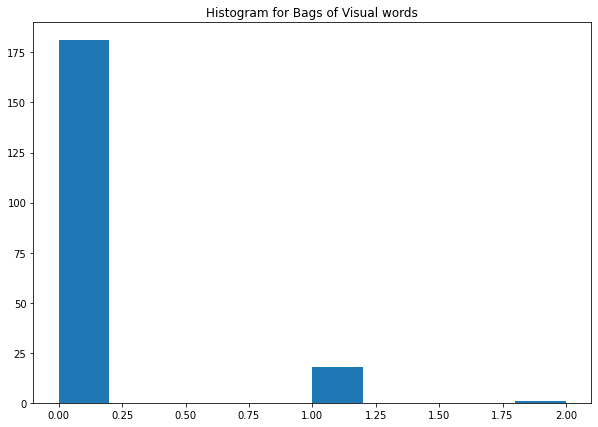

In [ ]:
## Plotting the Histogram for Bags of Visual words
from matplotlib import pyplot as plt

# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(one_vec)
plt.title("Histogram for Bags of Visual words")
# Show plot
plt.show()